<a href="https://colab.research.google.com/github/NethmiJayasinghe/ESN/blob/main/MyESN_PyRCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pyrcn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 2.1 MB/s eta 0:00:00


In [4]:
from sklearn.datasets import make_blobs
from pyrcn.base.blocks import InputToNode
from pyrcn.base.blocks import NodeToNode
from sklearn.linear_model import Ridge
from pyrcn.echo_state_network import ESNRegressor
from pyrcn.echo_state_network import ESNClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

#ESN 1.0

dataset = randomly generated using sklearn datasets

In [8]:
# Generate a toy dataset
U, y = make_blobs(n_samples=1000, n_features=10)

# Training set and Test set
trainLen = 900
X_train, y_train = U[:trainLen], y[:trainLen]
X_test, y_test = U[trainLen:], y[trainLen:]

In [43]:
# Initialize and train an ESNRegressor
esn = ESNRegressor()
esn.fit(X=X_train, y=y_train)

# # Initialize classifier
# clf = ESNClassifier()
# clf.fit(X=X_train, y=y_train)

ESNRegressor(input_to_node=InputToNode(), node_to_node=NodeToNode(),
             regressor=IncrementalRegression(), requires_sequence=False)

In [44]:
y_true = y_test
y_pred = esn.predict(X_test)

accuracy_score(y_true.flatten(), y_pred.astype(int).flatten())

0.59

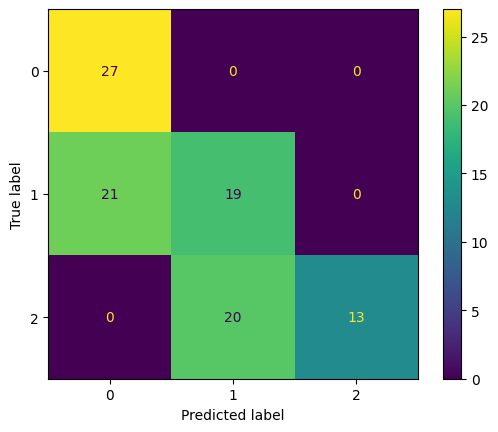

In [45]:
cm = confusion_matrix(y_true, y_pred.astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<Axes: >

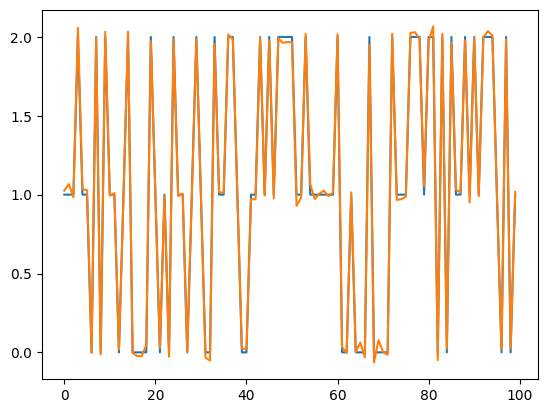

In [46]:
fig, axs = plt.subplots()

sns.lineplot(x=list(range(len(y_test))), y=y_test, ax=axs)  #Blue
sns.lineplot(x=list(range(len(y_test))), y=y_pred, ax = axs) #Orange


#ESN 1.1

Dataset = randomly generated using sklearn datasets

In [21]:
from pyrcn.base.blocks import HebbianNodeToNode
from pyrcn.base.blocks import BatchIntrinsicPlasticity

In [47]:
# Initialize and train an ESNRegressor
esn1 = ESNRegressor(input_to_node=BatchIntrinsicPlasticity(),node_to_node=HebbianNodeToNode(),regressor=Ridge(alpha=1e-5))
esn1.fit(X=X_train, y=y_train)


ESNRegressor(input_to_node=BatchIntrinsicPlasticity(),
             node_to_node=HebbianNodeToNode(), regressor=Ridge(alpha=1e-05),
             requires_sequence=False)

<Axes: >

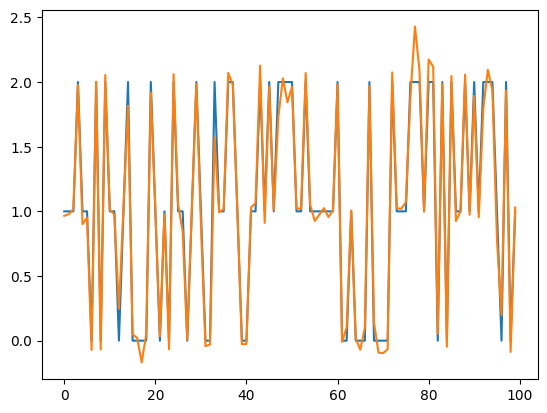

In [48]:
fig, axs = plt.subplots()

sns.lineplot(x=list(range(len(y_test))), y=y_test, ax=axs)  #Blue
sns.lineplot(x=list(range(len(y_test))), y=esn1.predict(X_test), ax = axs) #Orange

In [49]:
y_pred = esn1.predict(X_test)
accuracy_score(y_true.flatten(), y_pred.astype(int).flatten())

0.64

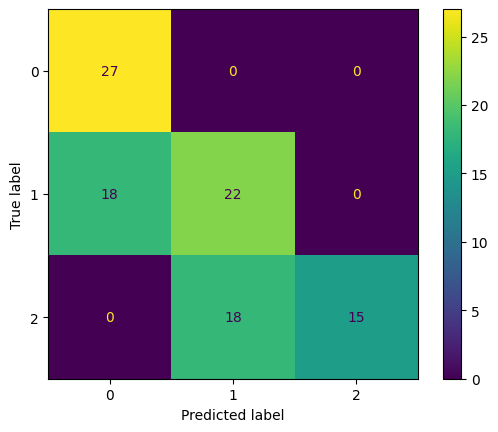

In [50]:
cm = confusion_matrix(y_true, y_pred.astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#ESN 2.0

Deep ESN / Multilayer ESN


In [28]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [35]:
l1 = Pipeline([('i2n1', InputToNode(hidden_layer_size=100)),('n2n1', NodeToNode(hidden_layer_size=100))])

l2 = Pipeline([('i2n2', InputToNode(hidden_layer_size=400)),('n2n2', NodeToNode(hidden_layer_size=400))])

i2n = FeatureUnion([('l1', l1),('l2', l2)])
n2n = NodeToNode(hidden_layer_size=500)

layered_esn = ESNRegressor(input_to_node=i2n,node_to_node=n2n)
layered_esn.fit(X=X_train, y=y_train)

ESNRegressor(input_to_node=FeatureUnion(transformer_list=[('l1',
                                                           Pipeline(steps=[('i2n1',
                                                                            InputToNode(hidden_layer_size=100)),
                                                                           ('n2n1',
                                                                            NodeToNode(hidden_layer_size=100))])),
                                                          ('l2',
                                                           Pipeline(steps=[('i2n2',
                                                                            InputToNode(hidden_layer_size=400)),
                                                                           ('n2n2',
                                                                            NodeToNode(hidden_layer_size=400))]))]),
             node_to_node=NodeToNode(), regressor=IncrementalRegression(),
             requires_sequence=False)

<Axes: >

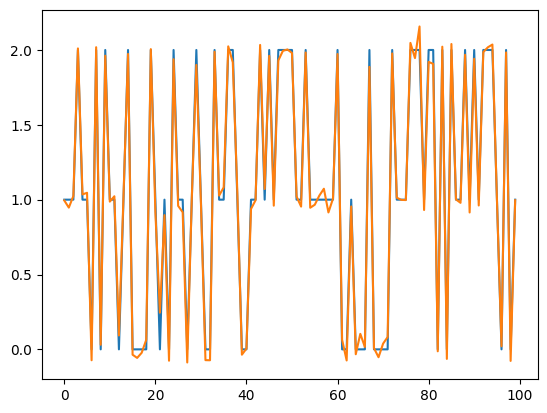

In [36]:
fig, axs = plt.subplots()

sns.lineplot(x=list(range(len(y_test))), y=y_test, ax=axs)  #Blue
sns.lineplot(x=list(range(len(y_test))), y=layered_esn.predict(X_test), ax = axs) #Orange

In [37]:
y_pred = layered_esn.predict(X_test)
accuracy_score(y_true.flatten(), y_pred.astype(int).flatten())

0.55

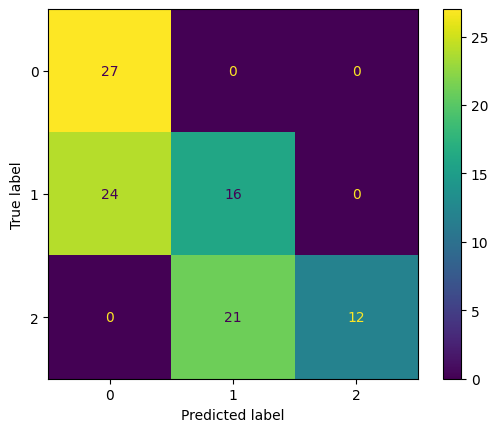

In [38]:
cm = confusion_matrix(y_true, y_pred.astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()